## Image Segmentation

Inspired by "Artificial intelligence for microscopy: what you should know", the main goal of this notebook seeks to image segment a neuron into multiple categories. Image Segmentation is the process of partitioning an image into segments to simplify and/or change the representation.
There are the following Segmentation Techniques. Reference can be found [here](https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980)

Supervised

* Thresholding with Human Input
* Random Walker 
* Active Contour Method

Unsupervised

* Thersholding with no Human Input
* Slic Method
* Felzenszwaib

### Method One: Thresholding
Transforming an image into a binary image over a certain threshold. This is useful if the image is multi colored. Effects greatly diminished if the image is in gray scale. It can simplfy vizualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io

In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20cd89fa0b8>)

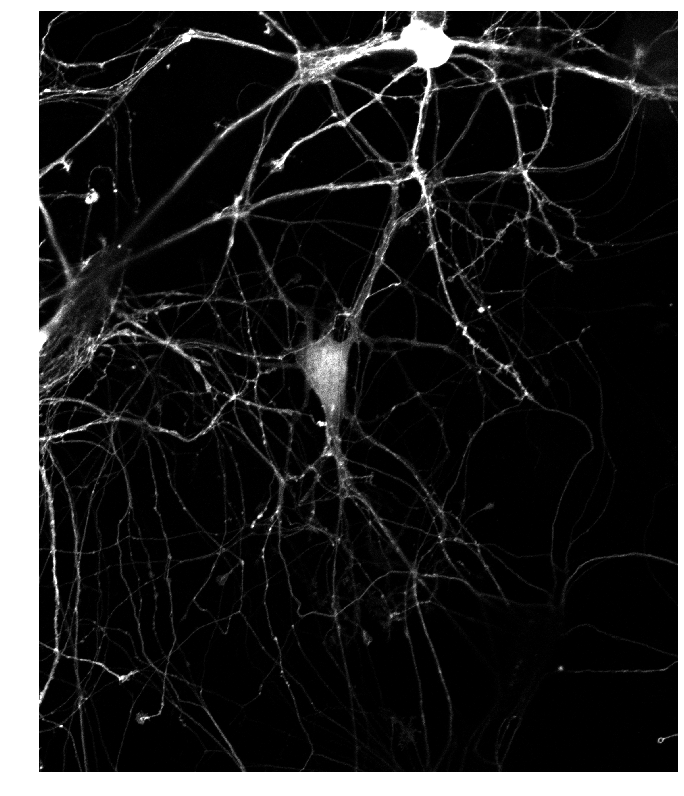

In [3]:
img_data = io.imread('D:\Program Projects\Lab Project\input\convert.png')
image_show(img_data)

(0, 256)

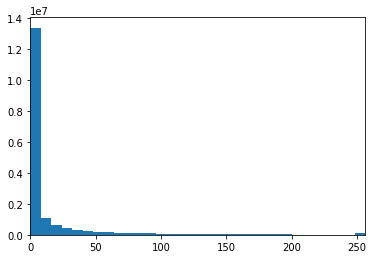

In [4]:
#Let us find the frequency of hist
fig, ax = plt.subplots(1, 1)
ax.hist(img_data.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256)
#From the image, there is a large amount of darkspace. Which is expected as the
#image shows neurons suspended

In [5]:
#TODO optimize threshold_transformer. O(N^2)
def threshold_transformer(threshold, img_data, contrast = False):
    thres_img_data = img_data.copy()
    for row in range(len(img_data)):
        for col in range(len(img_data[0])):
            pixel = img_data[row][col]
            if(np.sum(pixel) < threshold):
                thres_img_data[row][col] = np.array([0,0,0])
            elif contrast:
                thres_img_data[row][col] = np.array([255,255,255])
    return thres_img_data    

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20cd9fb6b00>)

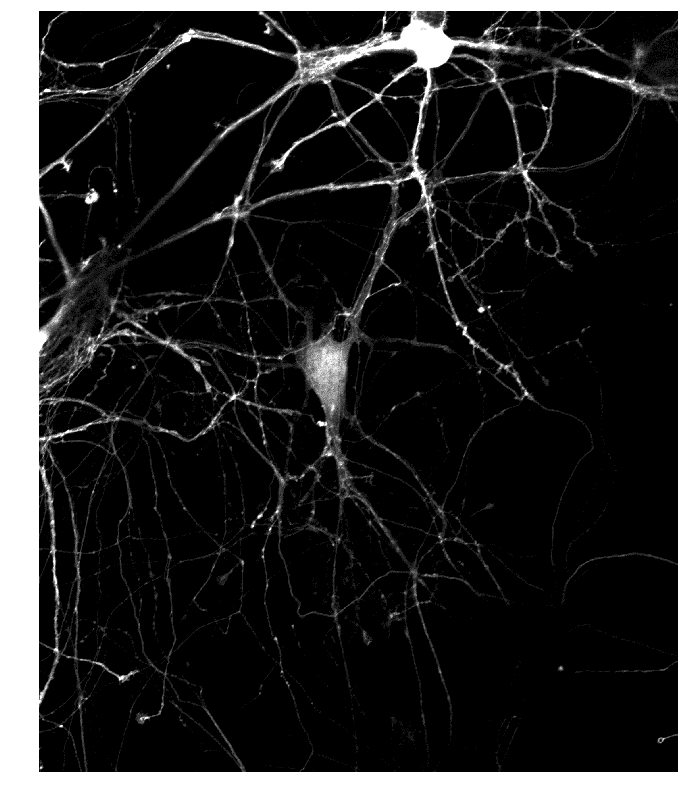

In [6]:
#Supervised Thresholding. We are going to choose the intensity
thres_img_data = threshold_transformer(50, img_data)
image_show(thres_img_data)

## Method 2: Active Contour Segmentation
Active Contour segmentation is initialized using a user-defined contour around the area of interest. This contour then slowly contracts and is attracted or repelled from light and edges.

In [7]:
img_data = io.imread('D:\Program Projects\Lab Project\input\RT_HC_10X_12-4-19_PLMD91_A.png')


In [8]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

In [9]:
#Find dimension of the img_data 
print(img_data.shape)

(3072, 2822, 3)


In [10]:
points = circle_points(200, [100, 1500], 100)[:-1]
#Note Since I am not an expert on neuro, if there are spines in the target

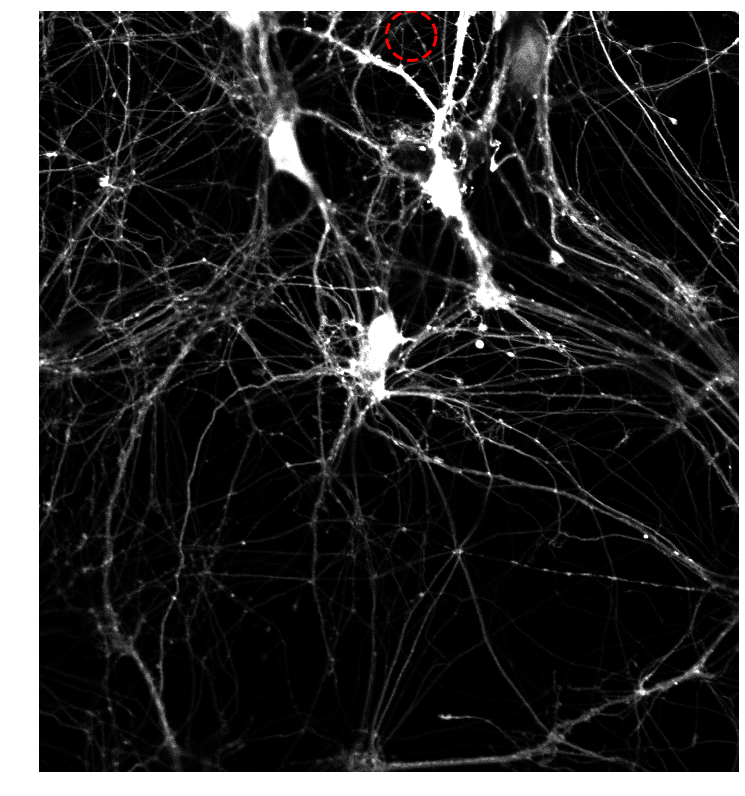

In [11]:
fig, ax = image_show(img_data)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

C:\Users\Russel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


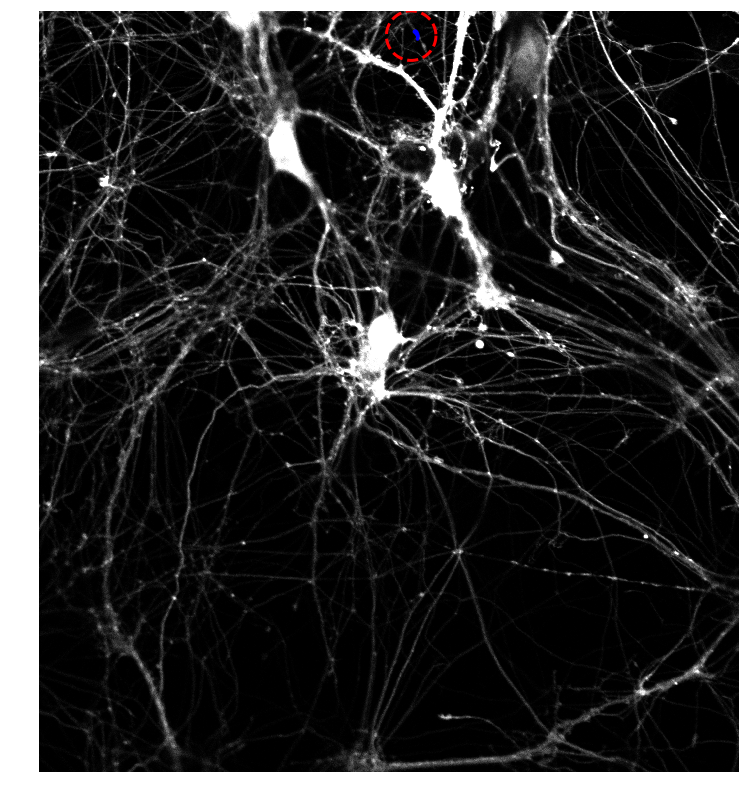

In [13]:
snake = seg.active_contour(img_data, points,alpha=0.9,beta=0.3)
fig, ax = image_show(img_data)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
#The blue region is what it determines as a place of interest

### Method 3: Random Walker Segmentation TODO
A user interactively labels a small number of pixels which are known as labels. Unlabeled pixels then release a random walker, then determine the probability of a random walker reaching one of the prelabeled pixels. By assigning each pixel to the label for which the greatest probability is calculated, high-quality image segmentation may be obtained.
[Reference](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_random_walker_segmentation.html)

## Method Four: SLIC (Simple Linear Iterative Clustering)
This algorithm is practically K-Means Clustering

In [44]:
#Data loading
img_data = io.imread('D:\Program Projects\Lab Project\input\RT_HC_10X_12-4-19_PLMD91_A.png')
image_slic = seg.slic(img_data, n_segments=200)
#N_Segments are K-clusters
#Larger K, sharper the image

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20c8b66ca20>)

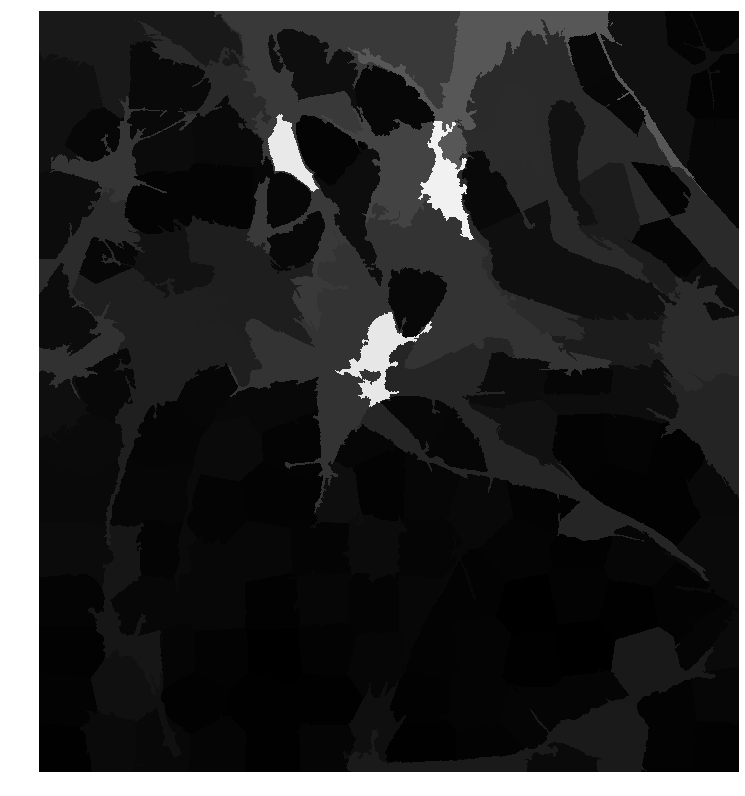

In [43]:
# label2rgb replaces each discrete label with the average interior color
# We are smoothing data values
image_show(color.label2rgb(image_slic, img_data, kind='avg'))

## Method 5: Felzenszwalb TODO
This algorithm also uses a machine learning algorithm called minimum-spanning tree clustering under the hood. This is a form of Density Seeking Clustering. 

In [ ]:
img_data = io.imread('D:\Program Projects\Lab Project\input\RT_HC_10X_12-4-19_PLMD91_A.png')

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20cd9fc3cf8>)

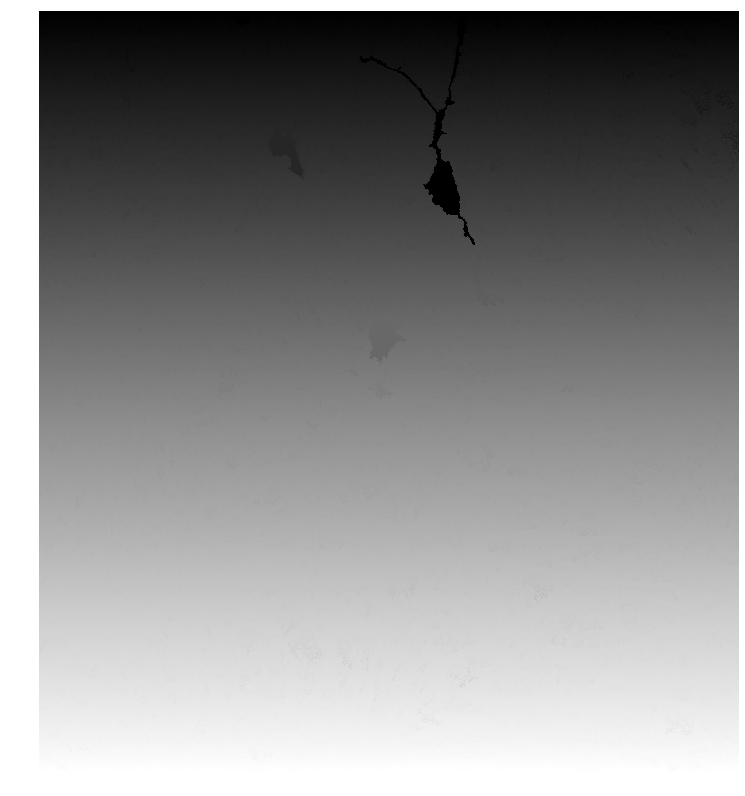

In [49]:
image_felzenszwalb = seg.felzenszwalb(img_data) 
image_show(image_felzenszwalb)